In [304]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle
import warnings
import xgboost as xgb
from sklearn.feature_selection import f_regression
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.classifier import StackingCVClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import label_binarize

In [305]:
df = pd.read_csv("Thessaloniki_classification.csv")

In [306]:
warnings.filterwarnings("ignore")

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     373 non-null    int64  
 1   Driver_licence             373 non-null    int64  
 2   Truck_licence              373 non-null    int64  
 3   Motor_licence              373 non-null    int64  
 4   Car_access                 373 non-null    int64  
 5   Bike_access                373 non-null    int64  
 6   Skate_access               373 non-null    int64  
 7   Motor_access               373 non-null    int64  
 8   Hsize                      373 non-null    int64  
 9   Vehicles                   373 non-null    int64  
 10  Mode                       373 non-null    int64  
 11  Time                       373 non-null    int64  
 12  Convenience                373 non-null    int64  
 13  Cost                       373 non-null    int64  

In [308]:
drops = ["Mode"]
X = df.drop(drops, axis=1)

<Axes: >

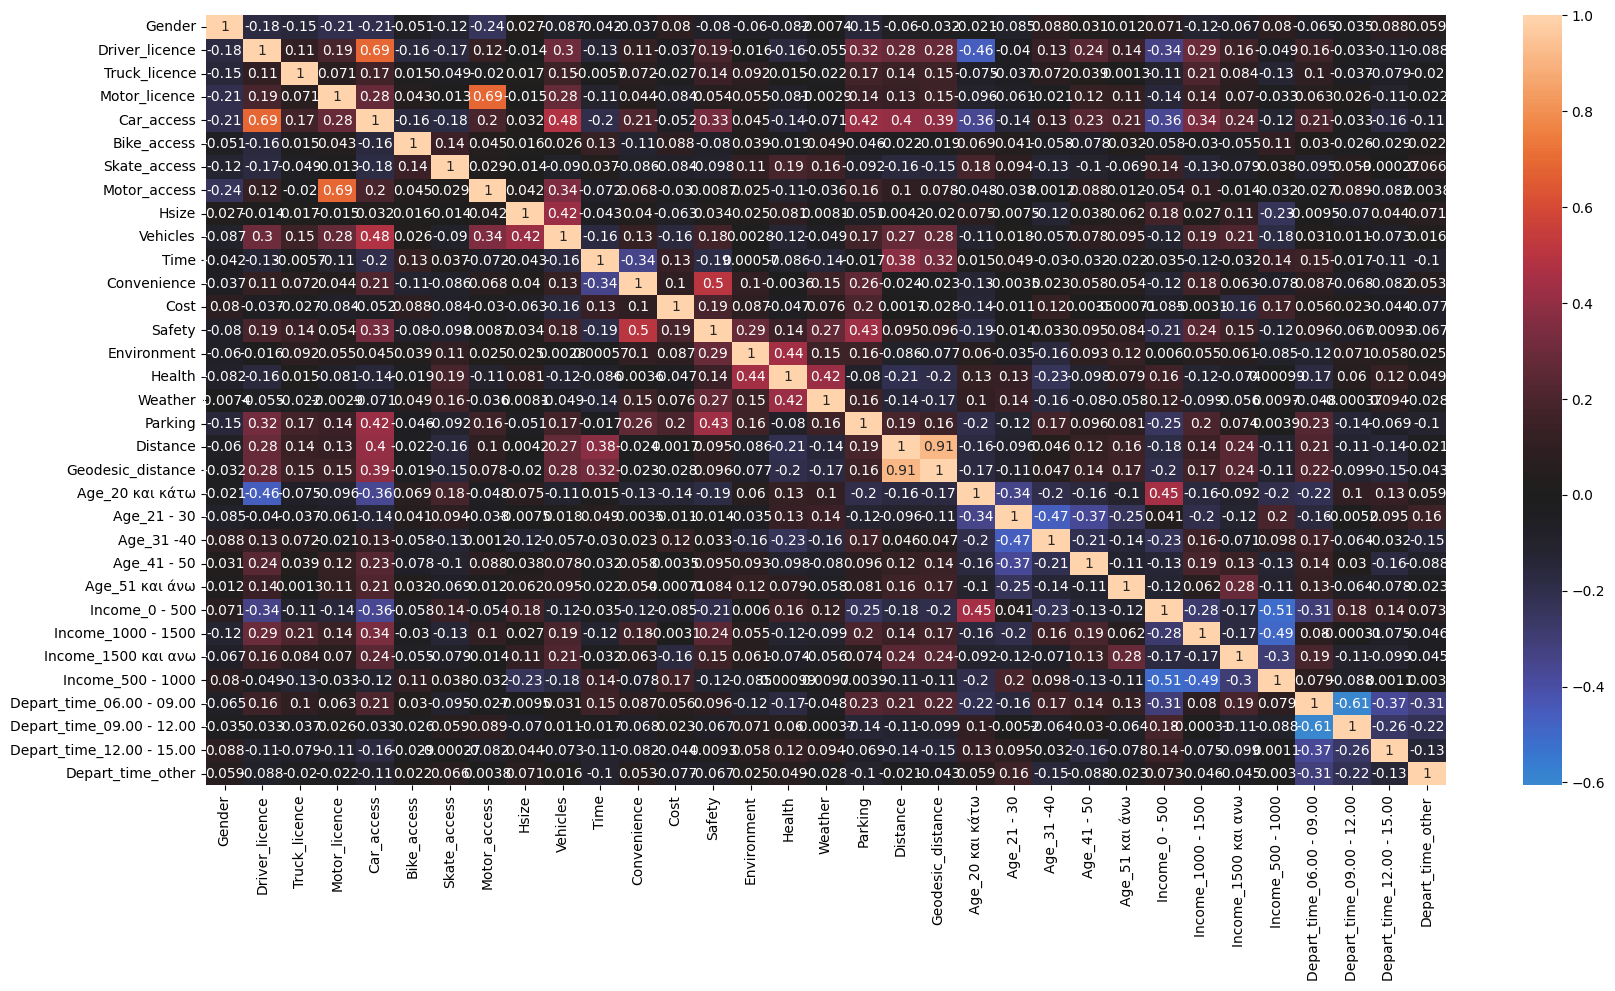

In [309]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [17]:
df.columns

Index(['Gender', 'Driver_licence', 'Truck_licence', 'Motor_licence',
       'Car_access', 'Bike_access', 'Skate_access', 'Motor_access', 'Hsize',
       'Vehicles', 'Mode', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Geodesic_distance', 'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40',
       'Age_41 - 50', 'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other'],
      dtype='object')

In [143]:
drops = [ 'Driver_licence','Motor_licence',
       'Vehicles', 'Mode',
       'Geodesic_distance']
X = df.drop(drops, axis=1)
y = df["Mode"]

# We will use the Variance inflation to reduce the amount of features so to remove multicollinearity

In [144]:
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                     Variable       VIF
0                       const  0.000000
1                      Gender  1.280754
2               Truck_licence  1.129117
3                  Car_access  2.277461
4                 Bike_access  1.128533
5                Skate_access  1.167889
6                Motor_access  1.182510
7                       Hsize  1.121948
8                        Time  1.852926
9                 Convenience  1.548247
10                       Cost  1.252335
11                     Safety  1.929032
12                Environment  1.526047
13                     Health  1.782115
14                    Weather  1.499315
15                    Parking  1.630820
16                   Distance  1.843080
17            Age_20 και κάτω       inf
18                Age_21 - 30       inf
19                 Age_31 -40       inf
20                Age_41 - 50       inf
21             Age_51 και άνω       inf
22             Income_0 - 500       inf
23         Income_1000 - 1500       inf


 we will start eliminating features with inf and rerunning the vif funtion

In [145]:
drops = [ 'Driver_licence','Motor_licence',
       'Vehicles', 'Mode',
       'Geodesic_distance', 'Income_0 - 500']
X = df.drop(drops, axis=1)
y = df["Mode"]

In [146]:
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                     Variable       VIF
0                       const  0.000000
1                      Gender  1.280754
2               Truck_licence  1.129117
3                  Car_access  2.277461
4                 Bike_access  1.128533
5                Skate_access  1.167889
6                Motor_access  1.182510
7                       Hsize  1.121948
8                        Time  1.852926
9                 Convenience  1.548247
10                       Cost  1.252335
11                     Safety  1.929032
12                Environment  1.526047
13                     Health  1.782115
14                    Weather  1.499315
15                    Parking  1.630820
16                   Distance  1.843080
17            Age_20 και κάτω       inf
18                Age_21 - 30       inf
19                 Age_31 -40       inf
20                Age_41 - 50       inf
21             Age_51 και άνω       inf
22         Income_1000 - 1500  2.504170
23        Income_1500 και ανω  1.957296


In [147]:
drops = [ 'Driver_licence','Motor_licence',
       'Vehicles', 'Mode',
       'Geodesic_distance', 'Income_0 - 500', 'Depart_time_other']
X = df.drop(drops, axis=1)
y = df["Mode"]
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                     Variable       VIF
0                       const  0.000000
1                      Gender  1.280754
2               Truck_licence  1.129117
3                  Car_access  2.277461
4                 Bike_access  1.128533
5                Skate_access  1.167889
6                Motor_access  1.182510
7                       Hsize  1.121948
8                        Time  1.852926
9                 Convenience  1.548247
10                       Cost  1.252335
11                     Safety  1.929032
12                Environment  1.526047
13                     Health  1.782115
14                    Weather  1.499315
15                    Parking  1.630820
16                   Distance  1.843080
17            Age_20 και κάτω       inf
18                Age_21 - 30       inf
19                 Age_31 -40       inf
20                Age_41 - 50       inf
21             Age_51 και άνω       inf
22         Income_1000 - 1500  2.504170
23        Income_1500 και ανω  1.957296


In [148]:
drops = [ 'Driver_licence','Motor_licence',
       'Vehicles', 'Mode',
       'Geodesic_distance', 'Income_0 - 500', 'Depart_time_other', 'Age_21 - 30']
X = df.drop(drops, axis=1)
y = df["Mode"]
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                     Variable        VIF
0                       const  70.231797
1                      Gender   1.280754
2               Truck_licence   1.129117
3                  Car_access   2.277461
4                 Bike_access   1.128533
5                Skate_access   1.167889
6                Motor_access   1.182510
7                       Hsize   1.121948
8                        Time   1.852926
9                 Convenience   1.548247
10                       Cost   1.252335
11                     Safety   1.929032
12                Environment   1.526047
13                     Health   1.782115
14                    Weather   1.499315
15                    Parking   1.630820
16                   Distance   1.843080
17            Age_20 και κάτω   1.435041
18                 Age_31 -40   1.489898
19                Age_41 - 50   1.443092
20             Age_51 και άνω   1.358411
21         Income_1000 - 1500   2.504170
22        Income_1500 και ανω   1.957296
23          Inco

Those are the final fatures

In [310]:
drops = [ 'Driver_licence','Motor_licence',
       'Vehicles', 'Mode', 'Car_access', 'Motor_access',
       'Geodesic_distance', 'Income_0 - 500', 'Depart_time_other', 'Age_21 - 30']
X = df.drop(drops, axis=1)
y = df["Mode"]

In [311]:
X.columns

Index(['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Distance', 'Age_20 και κάτω', 'Age_31 -40',
       'Age_41 - 50', 'Age_51 και άνω', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00'],
      dtype='object')

In [312]:
X

,Gender,Truck_licence,Bike_access,Skate_access,Hsize,Time,Convenience,Cost,Safety,Environment,...,Age_20 και κάτω,Age_31 -40,Age_41 - 50,Age_51 και άνω,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00
0,0,0,0,0,4,60,1,3,2,4,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,3,40,4,4,4,2,...,0,0,0,0,0,0,1,1,0,0
2,1,0,0,0,3,35,4,5,3,2,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,4,6,5,3,3,3,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,3,46,5,5,5,2,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,0,0,0,4,18,5,3,5,3,...,0,1,0,0,1,0,0,0,0,1
369,1,0,0,0,1,60,3,5,3,5,...,0,0,1,0,0,0,1,0,1,0
370,0,0,1,1,3,44,4,3,3,4,...,0,0,0,0,0,0,1,1,0,0
371,1,0,0,0,3,18,4,5,3,4,...,0,0,0,0,0,0,1,0,0,1


# Split Ratio of 60 : 40

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =42, stratify=y)

In [314]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    78
1    73
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    52
2    49
1    49
Name: count, dtype: int64


In [315]:
undersampler = RandomUnderSampler(sampling_strategy={0: 72}, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [316]:
undersampler = RandomUnderSampler(sampling_strategy={1: 72}, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [317]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    72
1    72
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    52
2    49
1    49
Name: count, dtype: int64


In [318]:
X_train

,Gender,Truck_licence,Bike_access,Skate_access,Hsize,Time,Convenience,Cost,Safety,Environment,...,Age_20 και κάτω,Age_31 -40,Age_41 - 50,Age_51 και άνω,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00
44,1,0,0,0,3,18,1,5,2,2,...,0,1,0,0,0,0,1,0,1,0
164,0,0,0,0,4,20,4,4,4,3,...,0,0,0,1,0,1,0,1,0,0
38,1,0,0,0,2,27,4,2,4,2,...,0,0,1,0,0,0,1,0,1,0
168,1,0,0,0,5,17,4,4,4,4,...,0,0,1,0,0,0,0,0,1,0
191,0,1,1,0,5,26,4,4,5,4,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0,0,1,0,3,50,3,3,3,3,...,1,0,0,0,0,0,1,1,0,0
316,0,0,0,0,3,40,3,3,4,4,...,1,0,0,0,0,0,1,0,1,0
224,1,0,0,0,4,18,3,3,3,3,...,0,0,0,0,0,0,0,0,1,0
217,1,0,0,0,5,16,4,4,2,2,...,1,0,0,0,0,0,1,0,1,0


In [319]:
X_test

,Gender,Truck_licence,Bike_access,Skate_access,Hsize,Time,Convenience,Cost,Safety,Environment,...,Age_20 και κάτω,Age_31 -40,Age_41 - 50,Age_51 και άνω,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00
267,1,0,0,0,4,25,3,3,3,4,...,1,0,0,0,0,0,0,0,1,0
248,0,0,0,0,3,19,3,3,3,4,...,1,0,0,0,0,0,0,0,0,1
5,1,0,0,0,4,5,5,5,5,5,...,0,0,0,0,0,0,1,0,1,0
128,0,0,1,0,4,6,1,5,3,1,...,0,0,0,0,0,0,1,0,1,0
32,0,0,0,0,2,34,4,5,5,4,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0,0,0,0,4,27,3,4,3,3,...,0,1,0,0,0,0,1,0,1,0
130,1,0,1,0,4,27,4,2,2,3,...,0,0,0,0,1,0,0,0,0,0
342,1,0,1,0,5,25,3,5,3,4,...,0,1,0,0,0,0,1,1,0,0
77,0,0,1,0,5,35,4,1,4,3,...,0,0,0,0,0,0,0,0,1,0


# Logistic Regression

In [320]:
log_reg=LogisticRegression(multi_class='ovr')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_train)
Log_Report = classification_report(y_train, y_pred_log)
print('Logistic Regression Report:', Log_Report, sep='\n')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.96      0.93      0.94        72
           2       0.97      0.99      0.98        72

    accuracy                           0.96       216
   macro avg       0.96      0.96      0.96       216
weighted avg       0.96      0.96      0.96       216



In [321]:
y_pred_log = log_reg.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Logistic Regression Report:', Log_Report, sep='\n')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.91      0.88      0.90        49
           2       0.92      1.00      0.96        49

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



In [322]:
coefficients = log_reg.coef_
coefficients_df = pd.DataFrame(coefficients, columns=X.columns)
coefficients_df = coefficients_df.transpose()
print("Coefficients for each class:")
print(coefficients_df)

Coefficients for each class:
                                  0         1         2
Gender                    -0.045817  0.643265 -0.506308
Truck_licence              0.038482 -0.092768  0.071865
Bike_access               -0.254941 -0.210167  0.366862
Skate_access              -0.229824 -1.251488  0.264676
Hsize                     -0.004846  0.092859 -0.064017
Time                      -0.399767  0.157476  0.249187
Convenience                0.599716 -0.880207  0.013007
Cost                      -1.403802  1.046682  0.010362
Safety                     0.668997  0.249291 -0.190083
Environment                0.279191 -0.016337 -0.055813
Health                    -0.453328 -0.909635  0.844066
Weather                   -0.791394 -0.588208  0.430155
Parking                    0.131707 -0.097400  0.161295
Distance                   0.836176 -0.190846 -2.950594
Age_20 και κάτω           -0.478137  0.106290  0.518721
Age_31 -40                 0.342298 -0.166239 -0.097749
Age_41 - 50        

In [323]:
odds = np.exp(coefficients)
coefficients_df = pd.DataFrame(coefficients, columns=X.columns)
coefficients_df = coefficients_df.transpose()
coefficients_df.columns = [f'Class_{i+1}' for i in range(coefficients_df.shape[1])]
odds_df = pd.DataFrame(odds, columns=X.columns)
odds_df = odds_df.transpose()
odds_df.columns = [f'Class_{i+1}' for i in range(odds_df.shape[1])] 
print("Coefficients for each class:")
print(coefficients_df)
print("\nOdds for each class:")
print(odds_df)

Coefficients for each class:
                            Class_1   Class_2   Class_3
Gender                    -0.045817  0.643265 -0.506308
Truck_licence              0.038482 -0.092768  0.071865
Bike_access               -0.254941 -0.210167  0.366862
Skate_access              -0.229824 -1.251488  0.264676
Hsize                     -0.004846  0.092859 -0.064017
Time                      -0.399767  0.157476  0.249187
Convenience                0.599716 -0.880207  0.013007
Cost                      -1.403802  1.046682  0.010362
Safety                     0.668997  0.249291 -0.190083
Environment                0.279191 -0.016337 -0.055813
Health                    -0.453328 -0.909635  0.844066
Weather                   -0.791394 -0.588208  0.430155
Parking                    0.131707 -0.097400  0.161295
Distance                   0.836176 -0.190846 -2.950594
Age_20 και κάτω           -0.478137  0.106290  0.518721
Age_31 -40                 0.342298 -0.166239 -0.097749
Age_41 - 50        

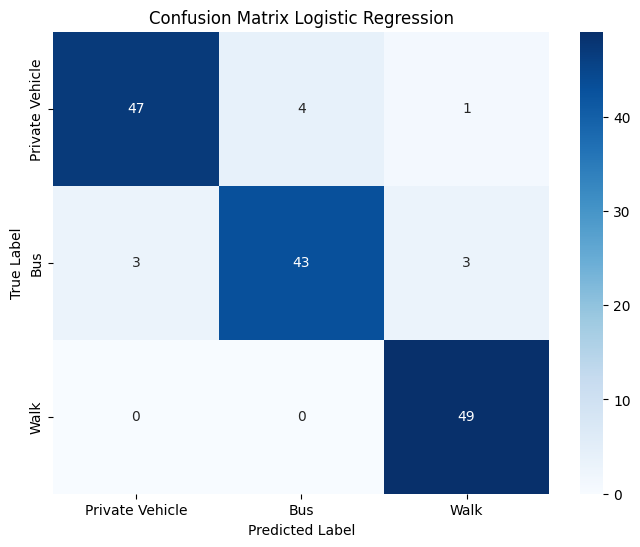

In [324]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [325]:
class_labels_mapping = {
    0: 'private vehicle',
    1: 'bus',
    2: 'walk'
}

In [326]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train)
y_test_bin = label_binarizer.transform(y_test)
classes = label_binarizer.classes_

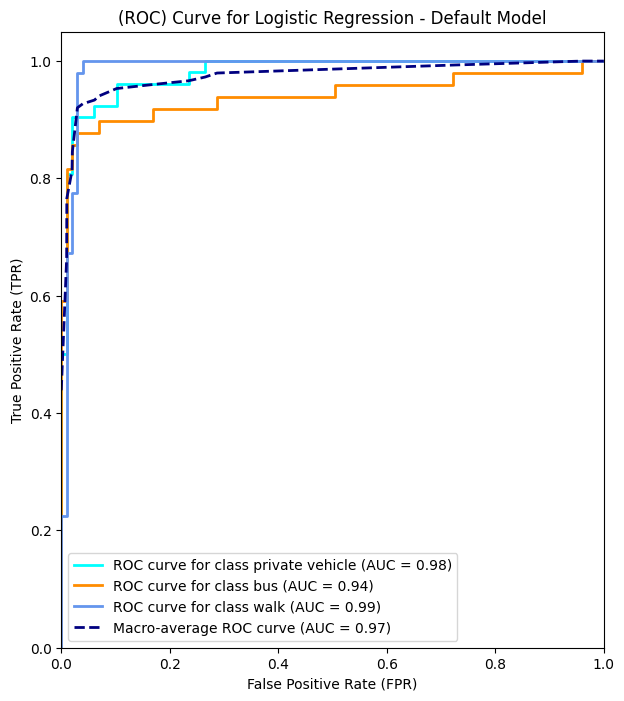

In [327]:
class_probabilities_log = log_reg.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], class_probabilities_log[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("(ROC) Curve for Logistic Regression - Default Model")

plt.show()

In [328]:
roc_auc['macro']

0.974234615897434

In [330]:
logreg_model=LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [331]:
y_pred_log = logreg_model.predict(X_train)
Log_Report = classification_report(y_train, y_pred_log)
print('Logistic Regression Report:', Log_Report, sep='\n')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.96      0.94      0.95        72
           2       0.97      0.99      0.98        72

    accuracy                           0.96       216
   macro avg       0.96      0.96      0.96       216
weighted avg       0.96      0.96      0.96       216



In [332]:
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Logistic Regression Report:', Log_Report, sep='\n')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.94      0.90      0.92        49
           2       0.92      0.98      0.95        49

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



In [337]:
coefficients = logreg_model.coef_
coefficients_df = pd.DataFrame(coefficients, columns=X.columns)
coefficients_df = coefficients_df.transpose()
print("Coefficients for each class:")
print(coefficients_df)

Coefficients for each class:
                                  0         1         2
Gender                     0.058804  0.598436 -0.499672
Truck_licence              0.008452 -0.080322  0.073570
Bike_access               -0.152973 -0.236208  0.329526
Skate_access              -0.187494 -1.259225  0.269528
Hsize                      0.188197  0.065019 -0.157548
Time                      -0.327103  0.156118  0.246739
Convenience                0.744466 -0.917716 -0.033091
Cost                      -1.259254  1.037479 -0.022646
Safety                     0.626252  0.263734 -0.200650
Environment                0.366663 -0.031316 -0.108620
Health                    -0.336302 -0.929088  0.784299
Weather                   -0.557842 -0.604498  0.344394
Parking                    0.187884 -0.113178  0.114643
Distance                   0.782691 -0.191493 -3.015031
Age_20 και κάτω           -0.418947  0.119647  0.513809
Age_31 -40                 0.670680 -0.211665 -0.147432
Age_41 - 50        

In [338]:
odds = np.exp(coefficients)
coefficients_df = pd.DataFrame(coefficients, columns=X.columns)
coefficients_df = coefficients_df.transpose()
coefficients_df.columns = [f'Class_{i+1}' for i in range(coefficients_df.shape[1])]
odds_df = pd.DataFrame(odds, columns=X.columns)
odds_df = odds_df.transpose()
odds_df.columns = [f'Class_{i+1}' for i in range(odds_df.shape[1])] 
print("Coefficients for each class:")
print(coefficients_df)
print("\nOdds for each class:")
print(odds_df)

Coefficients for each class:
                            Class_1   Class_2   Class_3
Gender                     0.058804  0.598436 -0.499672
Truck_licence              0.008452 -0.080322  0.073570
Bike_access               -0.152973 -0.236208  0.329526
Skate_access              -0.187494 -1.259225  0.269528
Hsize                      0.188197  0.065019 -0.157548
Time                      -0.327103  0.156118  0.246739
Convenience                0.744466 -0.917716 -0.033091
Cost                      -1.259254  1.037479 -0.022646
Safety                     0.626252  0.263734 -0.200650
Environment                0.366663 -0.031316 -0.108620
Health                    -0.336302 -0.929088  0.784299
Weather                   -0.557842 -0.604498  0.344394
Parking                    0.187884 -0.113178  0.114643
Distance                   0.782691 -0.191493 -3.015031
Age_20 και κάτω           -0.418947  0.119647  0.513809
Age_31 -40                 0.670680 -0.211665 -0.147432
Age_41 - 50        

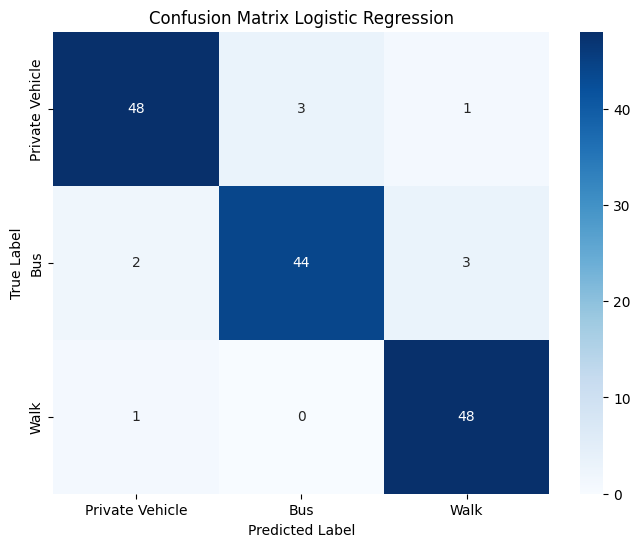

In [334]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

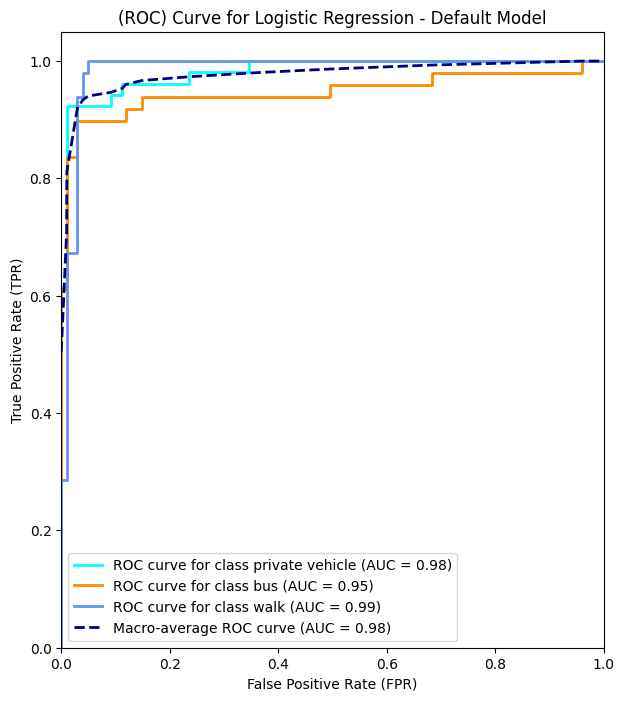

In [335]:
class_probabilities_log = log_reg.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], class_probabilities_log[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("(ROC) Curve for Logistic Regression - Default Model")

plt.show()

In [336]:
roc_auc['macro']

0.9766557333255512